In [87]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Welcome to Data Analysis in Python

In this tutorial, We will see how to get started with Data Analysis in Python. The **Python packages** that we use in this notebook are:

* `numpy`
* `pandas`
* `matplotlib`
* `seaborn`

The **dataset** that we use in this notebook is **IPL (Indian Premier League) Dataset** posted on **Kaggle Datasets** sourced from **[cricsheet](http://cricsheet.org/)**.

![MSD](https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-vk3o0lgt5njai0ql5hov9artq5-20170715144519.Medi.jpeg)

**Data Science / Analytics** is all about finding valuable insights from the given dataset. Inshort, Finding answers that could help business. So, let us try to ask some questions reg. IPL.

### Questions:

* How many matches we've got in the dataset?
* How many seasons we've got in the dataset?
* Which Team had won by maximum runs?
* Which Team had won by maximum wicket?
* Which Team had won by closest Margin (minimum runs)?
* Which Team had won by minimum wicket?
* Which Season had most number of matches?
* Which IPL Team is more successful? 
* Has Toss-winning helped in winning matches?

### Loading required Python packages

In [100]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [89]:
file_path = 'C:\\Users\\SA31\\Downloads\\'

In [90]:
matches = pd.read_csv(file_path+'matches.csv')

In [91]:
matches.shape

(636, 18)

In [92]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [93]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [94]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


### How many matches we've got in the dataset?

In [183]:
#matches.shape[0]

matches['id'].max()

636

### How many seasons we've got in the dataset?

In [195]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [194]:
len(matches['season'].unique())

10

### Which Team had won by maximum runs?

In [165]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

### Which Team had won by maximum wickets?

In [168]:
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

### Which Team had won by (closest margin) minimum runs?

In [180]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

### Which Team had won by minimum wickets?

In [178]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

### Which season had most number of matches?

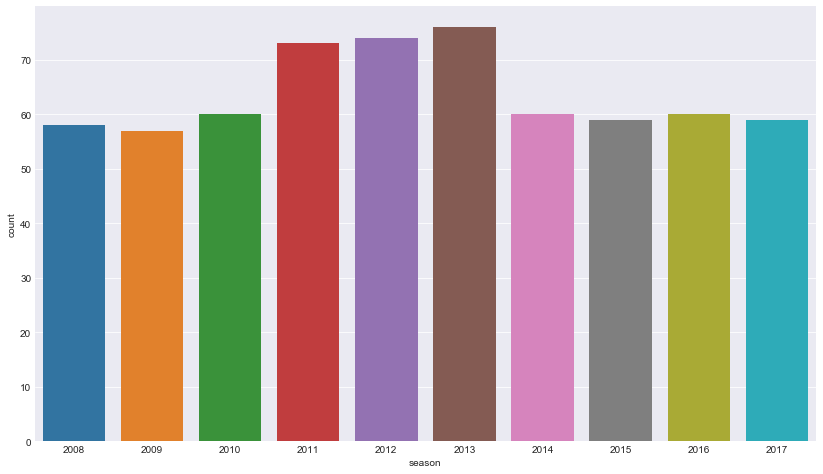

In [95]:
sns.countplot(x='season', data=matches)
plt.show()

### The most successful IPL Team

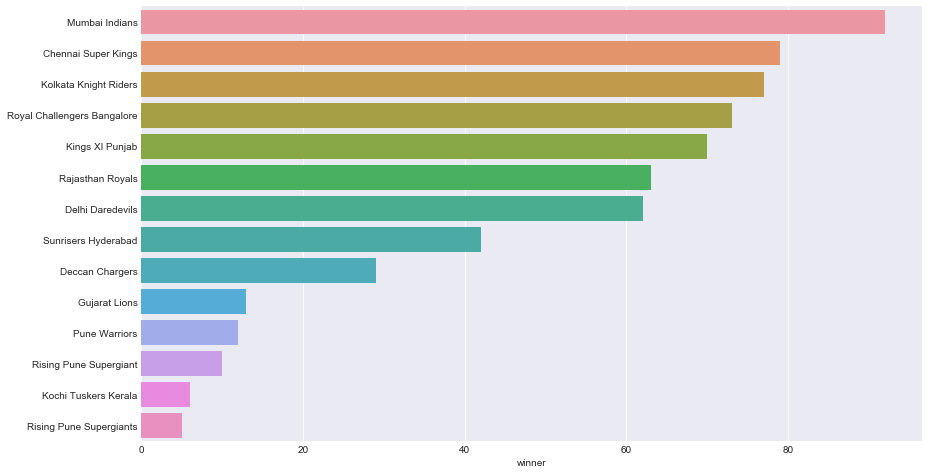

In [96]:
#sns.countplot(y='winner', data = matches)
#plt.show

data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

### Top player of the match Winners

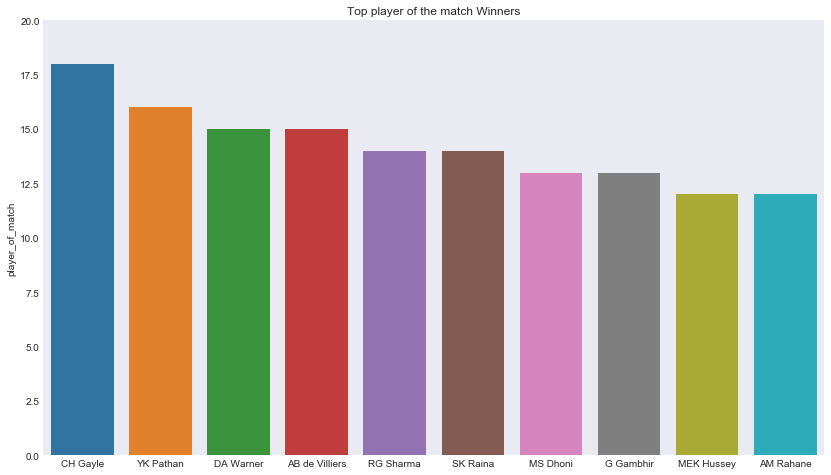

In [99]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

### Has Toss-winning helped in Match-winning?

How many Toss winning teams have won the matches? 

In [140]:
ss = matches['toss_winner'] == matches['winner']

ss.groupby(ss).size()

False    311
True     325
dtype: int64

What's the percentage of it?

In [149]:
#ss.groupby(ss).size() / ss.count()

#ss.groupby(ss).size() / ss.count() * 100

round(ss.groupby(ss).size() / ss.count() * 100,2)

False    48.9
True     51.1
dtype: float64

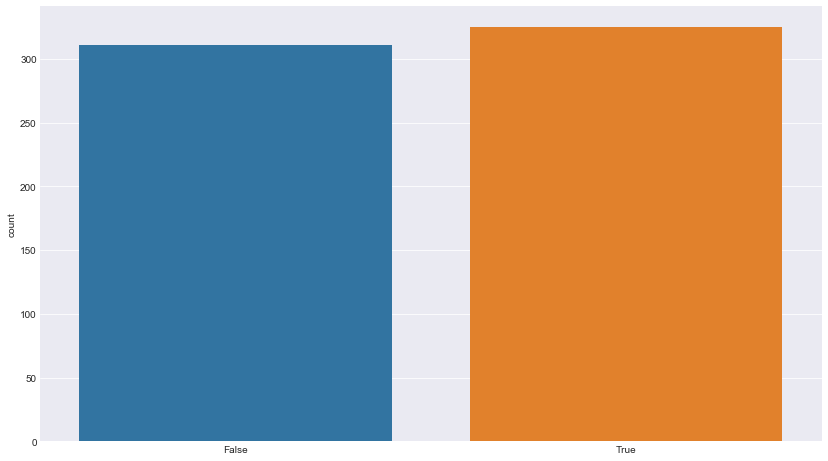

In [154]:
#sns.countplot(matches['toss_winner'] == matches['winner'])
sns.countplot(ss);

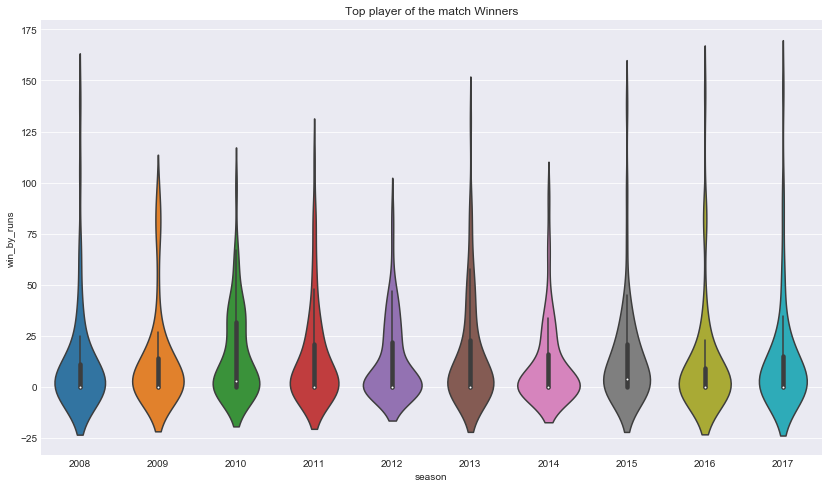

In [198]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.violinplot(x = 'season', y = 'win_by_runs', data=matches); #palette="Blues");
plt.show()